In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

# Reader

In [2]:
#file_path = "/home/cmsdaq/Analysis/Data/ReproducibilityTest/BAW_6_1.scan"    # series config, read S11 and S21
file_path = "/home/cmsdaq/Analysis/Data/reco/run0226.scan"    # series config, read S11 and S21
reader = scan_handler.ScanReader(file_path)        # create the object

In [3]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'Qcorr', 'Qr', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [4]:
d = reader.get_parameters('depth')
tmp = np.where(d!=-2)[0]
print(np.min(d[tmp]))

loc = np.argwhere(d==np.min(d[tmp]))

print(loc)


0.013667841604097508
[[106]]


In [5]:
Q = reader.get_parameters('Q')
tmp = np.where(Q!=-2)[0]
print(np.max(Q[tmp]))

loc = np.argwhere(Q==np.max(Q[tmp]))

print(loc)


6859162.699968552
[[42]]


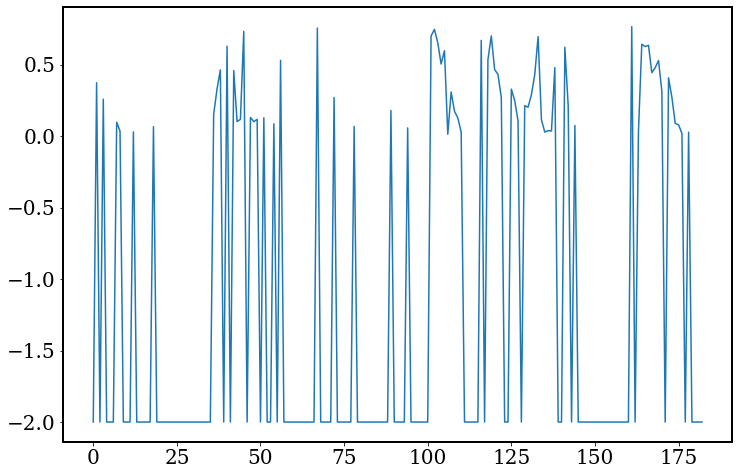

In [6]:
plt.plot(d)

No handles with labels found to put in legend.


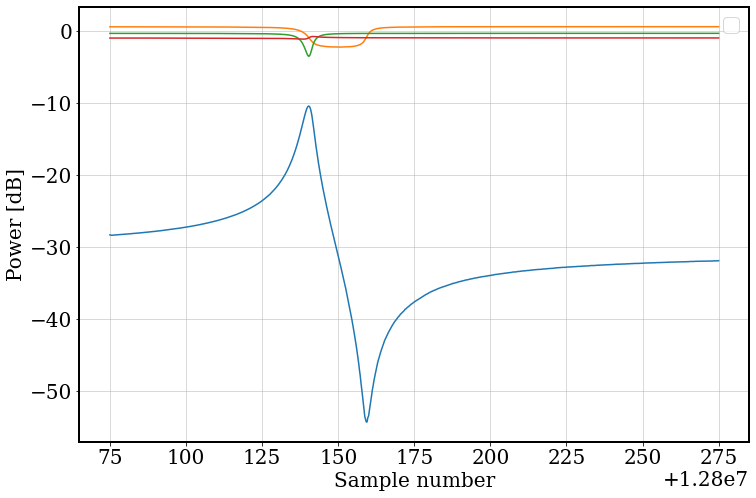

In [7]:
l = 3

power = reader.get_resonance(loc=l,label='S21')['power']
phase = reader.get_resonance(loc=l,label='S21')['phase']
freq = reader.get_resonance(loc=l,label='S21')['freq']

#utils.fit_resonance(freq*1e-6, power,verbose=True)
plt.plot(freq,power)
plt.plot(freq,phase)
power = reader.get_resonance(loc=l,label='S11')['power']
freq = reader.get_resonance(loc=l,label='S11')['freq']
phase = reader.get_resonance(loc=l,label='S11')['phase']
plt.plot(freq,power)
plt.plot(freq,phase)
 
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dB]')
plt.grid(alpha=0.6)
plt.show()

conversion is: dB-lin
[ 6.27049126e-06  1.25000000e-06  1.28001403e+01 -3.42767510e+02
  4.38751939e+03  1.00000000e+00] 
 [[ 0.00000000e+00  1.35000000e-07  1.28000750e+01 -3.42767510e+03
   4.38751939e+02  0.00000000e+00]
 [ 6.27049126e-04  1.35000000e-02  1.28002100e+01 -3.42767510e+01
   4.38751939e+04  1.00000000e+02]]
Parametro  1 :  2.1790075331709214e-06  +/-  6.373986879880996e-08
Parametro  2 :  3.6265633157819556e-06  +/-  6.118709059578254e-08
Parametro  3 :  12.800141033113821  +/-  6.835123539831577e-08
Parametro  4 :  -243.72647453470933  +/-  10.697877337210661
Parametro  5 :  3119.759229145714  +/-  136.93439547057554
Parametro  6 :  3.072978746376746  +/-  0.1573118021445187
Q = 1.76e+06  +/-  0.009423692549481954


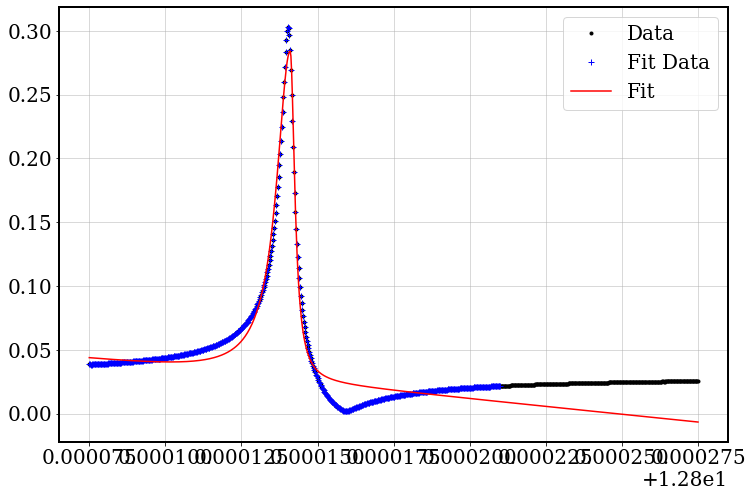

In [8]:
from process import utils

power = reader.get_resonance(loc=l,label='S21')['power']
phase = reader.get_resonance(loc=l,label='S21')['phase']
freq = reader.get_resonance(loc=l,label='S21')['freq']
utils.fit_resonance(freq*1e-6, power, verbose=True)


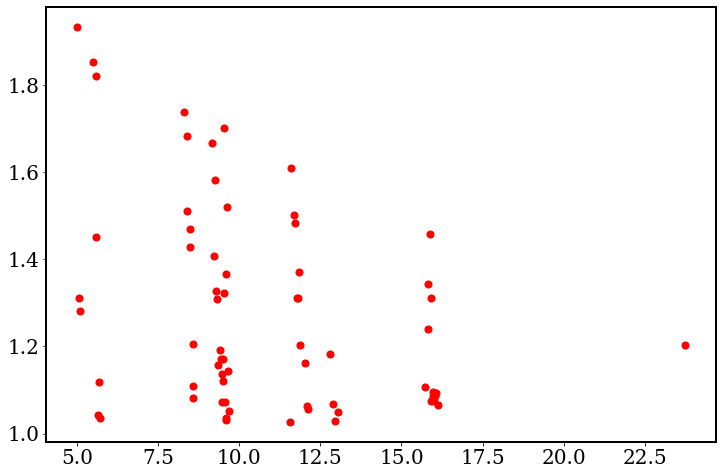

In [9]:
depth = np.fabs(reader.get_parameters("depth"))
corr = reader.get_parameters("Qcorr")
Q    = reader.get_parameters("Qr")
f0   = reader.get_parameters("f0")

loc = np.where((depth>0.03) & (depth!=2))[0]

for l in loc:
    plt.scatter(f0[l], corr[l], s=50, marker = 'o', color='red')

plt.show()

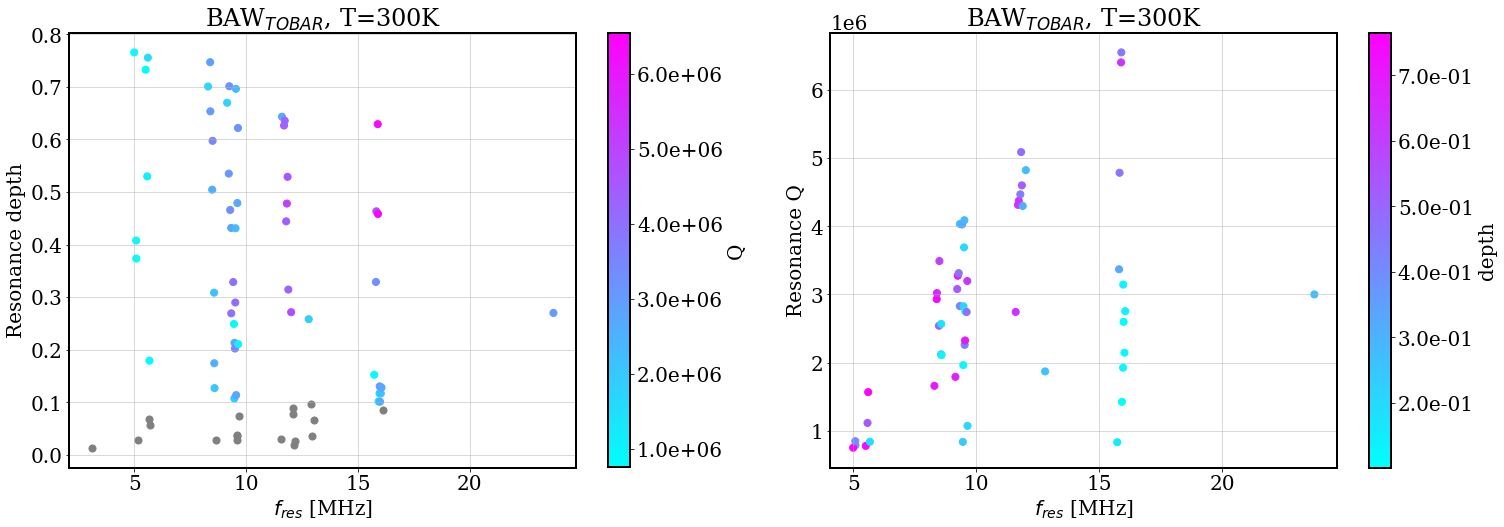

In [10]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Qr')
corr = reader.get_parameters('Qcorr')
newQ = Q*corr
peak_pos = reader.get_parameters('f0')


depth_thr = 0.1 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q<1e9))[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth')

e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

In [17]:
#i_stronzi =np.where((depth>= 0.7)&(f0>=8)&(f0<=10))[0]
i_stronzi =np.where((Q>1e6)&(f0>=6.5)&(f0<=10))[0]

print(Q[i_stronzi])
print(f0[i_stronzi])
print(depth[i_stronzi])
'''
indexSort = np.argsort(Q)[::-1]
print(f0[indexSort])
print(Q[indexSort])


print(depth[indexSort[0]])
'''

[1659237.19667597 2932105.90845586 3020790.90346618 2541044.56767903
 3490878.31010774 2121157.22749657 2568778.1850693  2110145.86137831
 1790374.60384678 3079893.43498709 3274745.88138571 3313259.62039394
 2829272.68980113 4035697.78147283 4027205.26758122 1963322.89705957
 2826172.60925198 3691022.79374249 4089470.97264561 2260587.91169361
 2325167.03228903 2751579.48464223 1056577.76938146 2112903.64808156
 2742738.33380652 3197562.93514766 1071694.6117443 ]
[8.2978299  8.3918983  8.39981428 8.48192327 8.50044425 8.56847614
 8.57617479 8.58703566 9.1522138  9.22499182 9.24676176 9.2867492
 9.33121642 9.3351124  9.42301239 9.47206287 9.48076579 9.50261678
 9.51572596 9.52652991 9.54433754 9.55453721 9.58805465 9.59620613
 9.60848625 9.63480763 9.6442976 ]
[0.70060957 0.74683243 0.65343823 0.50442091 0.59725786 0.30855295
 0.17431984 0.12705221 0.66968761 0.53495457 0.70107919 0.46580186
 0.43165454 0.2692518  0.32876227 0.10735831 0.21310672 0.20232838
 0.28985221 0.43104677 0.69612

'\nindexSort = np.argsort(Q)[::-1]\nprint(f0[indexSort])\nprint(Q[indexSort])\n\n\nprint(depth[indexSort[0]])\n'

In [12]:
'''
comment: the above plot has a scale which is obtained by:
- acquiring i, q in polar mode with the VNA
- from i,q the logMag is obtained as 20*log10(sqrt(i**2 + q**2))
- at this point we have a ratio in dB in hands. a linear ratio is then obtained with the following conversion: 10**(Y/10)
- the minus (-) sign is added artificially just to help the comparison with old plots

observation:
- the above plot has a Y scale which seems linear compared with the same plot from the 3 ports VNA which seems logaritmic instead --> to be understood

to make the plot obtained with the 2 ports and the 3 ports VNAs, one should do:
- take the Y value on the plot from the 2 ports VNA, consider the original power injected (-30 dBm) and obtain the depth of the resonance in mW to be compared with the plot from the 3 ports VNA: 10^(-30/10)*0.4

'''

'\ncomment: the above plot has a scale which is obtained by:\n- acquiring i, q in polar mode with the VNA\n- from i,q the logMag is obtained as 20*log10(sqrt(i**2 + q**2))\n- at this point we have a ratio in dB in hands. a linear ratio is then obtained with the following conversion: 10**(Y/10)\n- the minus (-) sign is added artificially just to help the comparison with old plots\n\nobservation:\n- the above plot has a Y scale which seems linear compared with the same plot from the 3 ports VNA which seems logaritmic instead --> to be understood\n\nto make the plot obtained with the 2 ports and the 3 ports VNAs, one should do:\n- take the Y value on the plot from the 2 ports VNA, consider the original power injected (-30 dBm) and obtain the depth of the resonance in mW to be compared with the plot from the 3 ports VNA: 10^(-30/10)*0.4\n\n'

# Comparison parallel vs series on deepest res

In [13]:
file_path = "/home/cmsdaq/Analysis/Data/ReproducibilityTest/BAW_6_1.scan"    # series config, read S11 and S21
reader_ser = scan_handler.ScanReader(file_path)        # create the object

file_path = "/home/cmsdaq/Analysis/Data/Test/BAW_6_1.scan"   # parallel conf, read B (repro)
reader_par = scan_handler.ScanReader(file_path)        # create the object

In [14]:
def findDeepest(reader):
    d = reader.get_parameters('depth')
    tmp = np.where(d!=-2)[0]
    loc = np.argwhere(np.fabs(d)==np.max(np.fabs(d[tmp])))
    return int(loc)

In [15]:
loc_ser = findDeepest(reader_ser)
loc_par = findDeepest(reader_par)

print(loc_ser, loc_par)

489 234


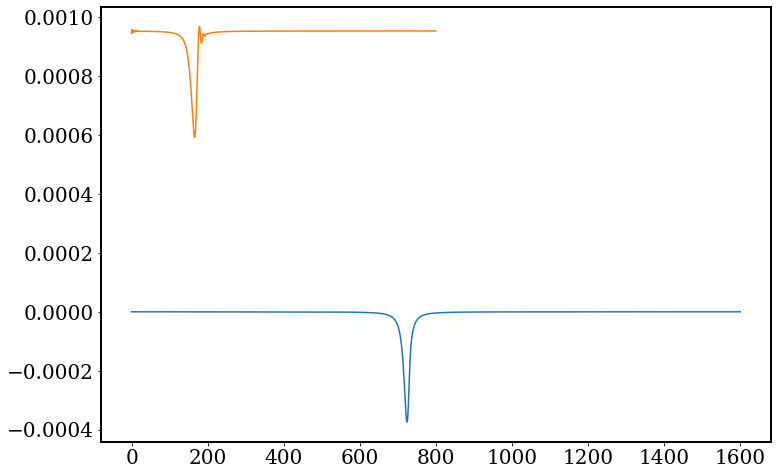

In [16]:
power_ser = reader_ser.get_resonance(loc=loc_ser,label='S21')['power']
phase_ser = reader_ser.get_resonance(loc=loc_ser,label='S21')['phase']
freq_ser = reader_ser.get_resonance(loc=loc_ser,label='S21')['freq']

#utils.fit_resonance(freq_ser*1e-6, power_ser,verbose=True)
plt.plot(-10**(power_ser/10)*(10**(-30/10)))   # /2 ?


power_par = reader_par.get_resonance(loc=loc_par,label='')['power']
phase_par = reader_par.get_resonance(loc=loc_par,label='')['phase']
freq_par = reader_par.get_resonance(loc=loc_par,label='')['freq']

plt.plot(10**(power_par/10))


plt.show()
